In [1]:
import pandas as pd
from datetime import datetime

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
# data.isnull().sum()

In [5]:
print(data["Order Date"].min())
print(data["Order Date"].max())
print(data["Country"].unique())
print(data["Region"].unique())
print(data["Segment"].unique())
print(data["Category"].unique())

2014-01-03 00:00:00
2017-12-30 00:00:00
['United States']
['South' 'West' 'Central' 'East']
['Consumer' 'Corporate' 'Home Office']
['Furniture' 'Office Supplies' 'Technology']


In [6]:
df1 = data.groupby('Region')[["Sales", "Profit"]].sum().reset_index().sort_values(by="Sales",ascending=False).set_index('Region')
profitrate = df1["Profit"] / df1["Sales"]
df2 = pd.DataFrame(profitrate, columns=["Profit Rate"])
merged_df = pd.merge(df1, df2, left_index=True, right_index=True)
merged_df.rename(columns={'Profit':'Total Profit', 'Sales':'Total Sales'}, inplace=True)
    
merged_df

,Total Sales,Total Profit,Profit Rate
Region,,,
West,725457.8245,108418.4489,0.149448
East,678781.2400,91522.7800,0.134834
Central,501239.8908,39706.3625,0.079216
South,391721.9050,46749.4303,0.119343


Text(0.5, 1.0, 'Profit Rate by Region')

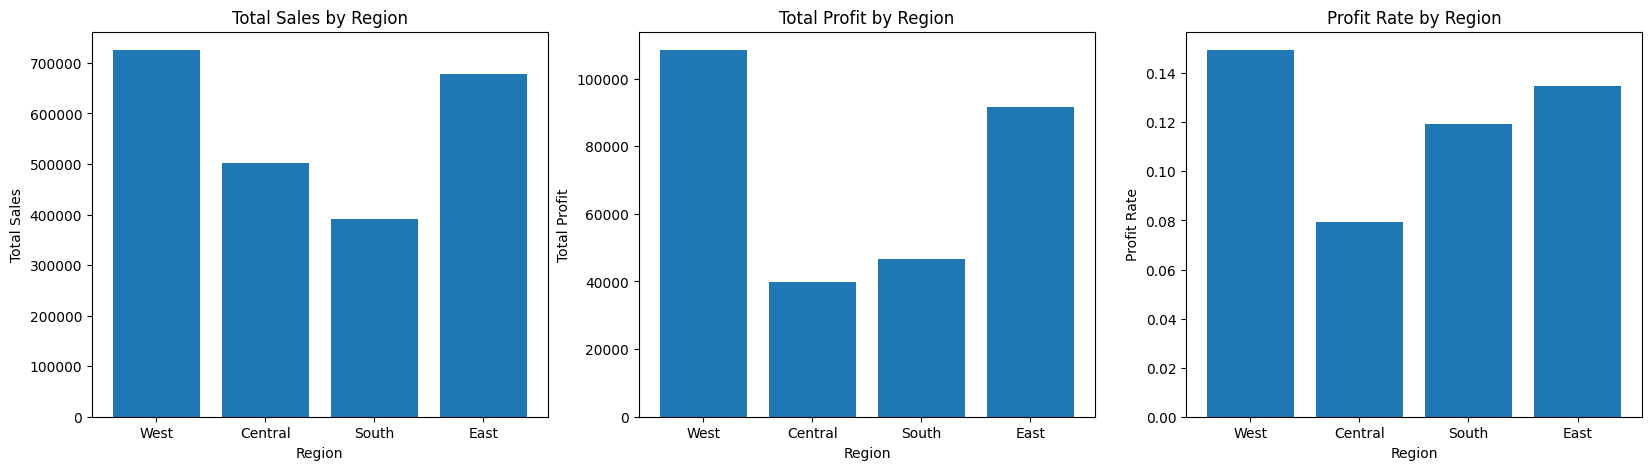

In [7]:
import matplotlib.pyplot as plt

order = ["West", "Central", "South", "East"]
sorted_df = merged_df.loc[order]

regions = sorted_df.index
Total_sales = sorted_df['Total Sales']
Total_profit = sorted_df['Total Profit']
profit_rate = sorted_df['Profit Rate']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plot for Total Sales
ax1.bar(regions, Total_sales)
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Sales')
ax1.set_title('Total Sales by Region')

# Plot for Total Profit
ax2.bar(regions, Total_profit)
ax2.set_xlabel('Region')
ax2.set_ylabel('Total Profit')
ax2.set_title('Total Profit by Region')


 # Plot for Total Profit
ax3.bar(regions, profit_rate)
ax3.set_xlabel('Region')
ax3.set_ylabel('Profit Rate')
ax3.set_title('Profit Rate by Region')


In [8]:
def kpibyvar(var, region=None):
    if region is None:
        regiondata = data  # Use all data if region is not provided
    else:
        regiondata = data.loc[data['Region'] == region]
    
    df1 = regiondata.groupby(var)[["Sales", "Profit"]].sum().reset_index().sort_values(by="Sales",ascending=False).set_index(var)
    profitrate = df1["Profit"] / df1["Sales"]
    df2 = pd.DataFrame(profitrate, columns=["Profit Rate"])
    merged_df = pd.merge(df1, df2, left_index=True, right_index=True)
    merged_df.rename(columns={'Profit':'Total Profit', 'Sales':'Total Sales'}, inplace=True)
    
    return merged_df


In [9]:
kpibyvar("Segment")

,Total Sales,Total Profit,Profit Rate
Segment,,,
Consumer,1.161401e+06,134119.2092,0.115481
Corporate,7.061464e+05,91979.1340,0.130255
Home Office,4.296531e+05,60298.6785,0.140343


In [10]:
kpibyvar("Segment","West")

,Total Sales,Total Profit,Profit Rate
Segment,,,
Consumer,362880.7730,57450.6040,0.158318
Corporate,225855.2745,34437.4299,0.152476
Home Office,136721.7770,16530.4150,0.120906


- Customer has the highest total sales 

In [11]:
kpibyvar("Category","West")

,Total Sales,Total Profit,Profit Rate
Category,,,
Furniture,252612.7435,11504.9503,0.045544
Technology,251991.8320,44303.6496,0.175814
Office Supplies,220853.2490,52609.8490,0.238212


- Furniture has the lowest total profit and the fit rate

In [12]:
kpibyvar("Sub-Category","West")

,Total Sales,Total Profit,Profit Rate
Sub-Category,,,
Chairs,101781.3280,4027.5843,0.039571
Phones,98684.3520,9110.7426,0.092322
Tables,84754.5620,1482.6073,0.017493
Storage,70532.8520,8645.3222,0.122572
Accessories,61114.1160,16484.5983,0.269735
Binders,55961.1130,16096.8016,0.287643
Copiers,49749.2420,19327.2351,0.388493
Machines,42444.1220,-618.9264,-0.014582
Bookcases,36004.1235,-1646.5117,-0.045731


- Chair has the highest total sale but with low profit rate
- Machine bookcase has the Minus profit and minus profit rate
- Need to modify the price to cover the cost for machines and bookcases

In [13]:
kpibyvar("State","West")

,Total Sales,Total Profit,Profit Rate
State,,,
California,457687.6315,76381.3871,0.166885
Washington,138641.2700,33402.6517,0.240929
Arizona,35282.0010,-3427.9246,-0.097158
Colorado,32108.1180,-6527.8579,-0.203309
Oregon,17431.1500,-1190.4705,-0.068296
Nevada,16729.1020,3316.7659,0.198263
Utah,11220.0560,2546.5335,0.226963
Montana,5589.3520,1833.3285,0.328004
New Mexico,4783.5220,1157.1161,0.241896


- California has the highest total sales 
- Arizona Colorado Oregon Has negative profit rate 
- We need to have different business strategies for these states

In [14]:
data.loc[:, "Year"] = pd.to_datetime(data["Order Date"]).dt.year
kpibyvar( "Year","West").reset_index().sort_values(by="Year").set_index("Year")

,Total Sales,Total Profit,Profit Rate
Year,,,
2014,147883.0330,20065.6912,0.135686
2015,139966.2495,20492.1947,0.146408
2016,187480.1765,24051.6069,0.128289
2017,250128.3655,43808.9561,0.175146


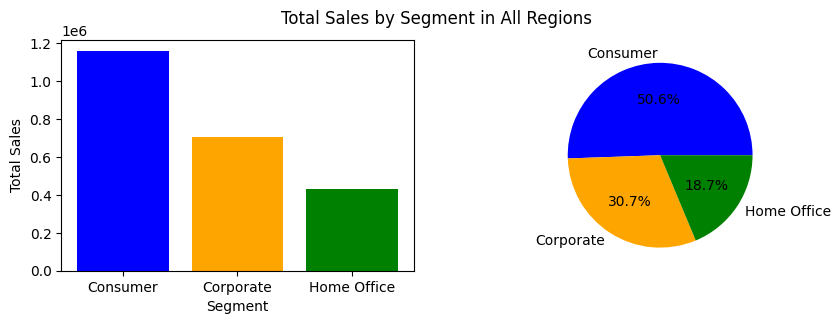

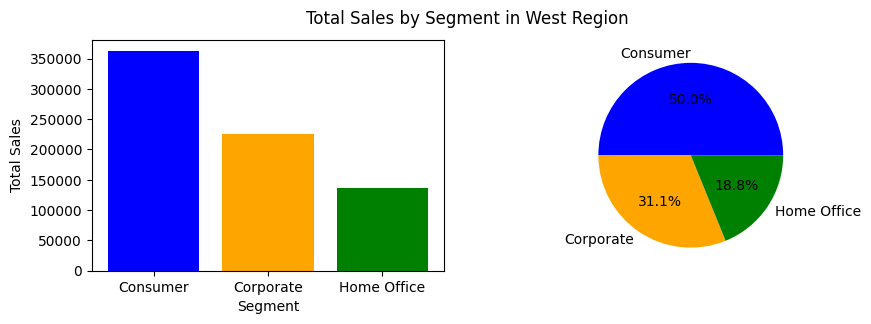

In [15]:
def salesbyvarchart(var, region=None):
    if region is None:
        regiondata = data  # Use all data if region is not provided
        region_text = "All Regions"
    else:
        regiondata = data.loc[data['Region'] == region]
        region_text = region + " Region"

    df1 = regiondata.groupby(var)["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False).set_index(var)
    df1.rename(columns={'Sales': 'Total Sales'}, inplace=True)
    pct = regiondata.groupby(var)[["Sales"]].sum() / regiondata["Sales"].sum()
    pct.rename(columns={'Sales': 'Sales Percentage'}, inplace=True)
    merged_df = pd.merge(df1, pct, on=var)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

    # Plot the bar chart
    colors = ['blue', 'orange', 'green', 'yellow']
    ax1.bar(merged_df.index, merged_df['Total Sales'], color=colors)
    ax1.set_xlabel(var)
    ax1.set_ylabel('Total Sales')

    # Plot the pie chart
    ax2.pie(merged_df['Sales Percentage'], labels=merged_df.index, autopct='%1.1f%%', colors=colors)
    plt.suptitle("Total Sales by " + var + " in " + region_text)
    plt.show()

salesbyvarchart("Segment")
salesbyvarchart("Segment","West")

- Consumer has the highest sales amount, accounting for 50% of the total sales.
- Home Office has the lowest sales amount. 

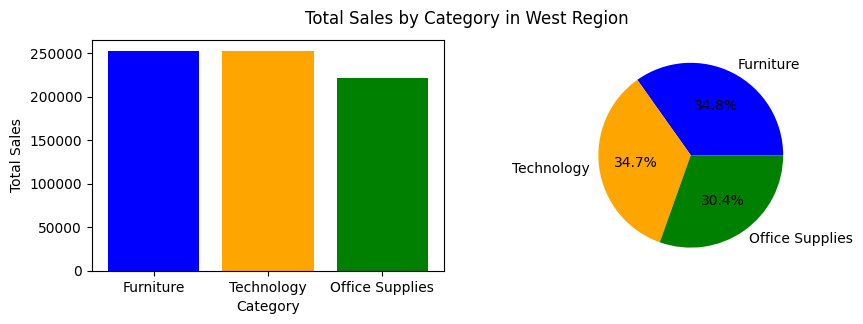

In [16]:
salesbyvarchart("Category","West")

- The total sales of each category are similar 

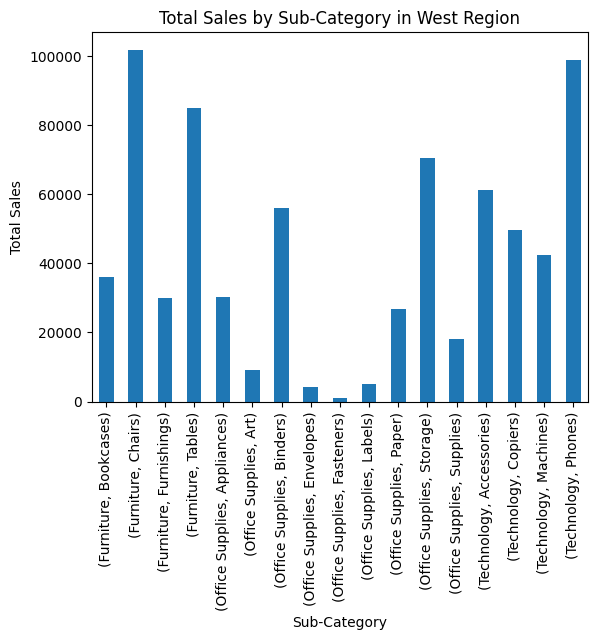

In [17]:
regiondata = data.loc[data['Region'] == "West"]
    
df1 = regiondata.groupby(["Category", "Sub-Category"])[["Sales"]].sum() 

df1["Sales"].plot.bar()
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Sub-Category in West Region")
plt.show()

- Table and Chair have high total sales in Furniture 
- Phone has higest total sales in Technology 


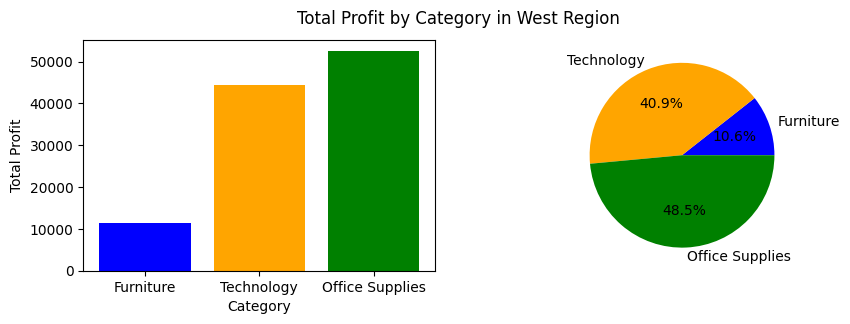

In [18]:
def profitbyvarchart(var, region=None):
    if region is None:
        regiondata = data  # Use all data if region is not provided
        region_text = "All Regions"
    else:
        regiondata = data.loc[data['Region'] == region]
        region_text = region + " Region"
    
    
    df1=regiondata.groupby(var)["Profit"].sum().reset_index().sort_values(by="Profit",ascending=True).set_index(var)
    df1.rename(columns={'Profit':'Total Profit'},inplace=True)
    pct = regiondata.groupby(var)[["Profit"]].sum()/regiondata["Profit"].sum()
    pct.rename(columns={'Profit':'Profit Percentage'},inplace=True)
    merged_df = pd.merge(df1,pct,on = var)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

    # Plot the bar chart
    colors = [ 'blue', 'orange', 'green' , 'yellow']
    ax1.bar(merged_df.index, merged_df['Total Profit'], color=colors)
    ax1.set_xlabel(var)
    ax1.set_ylabel('Total Profit')

    # Plot the pie chart
    ax2.pie(merged_df['Profit Percentage'], labels=merged_df.index, autopct='%1.1f%%', colors=colors)
    plt.suptitle("Total Profit by " + var +" in " + region_text)
    plt.show()  
    
# profitbyvarchart("Category")  in all regions
profitbyvarchart("Category","West")

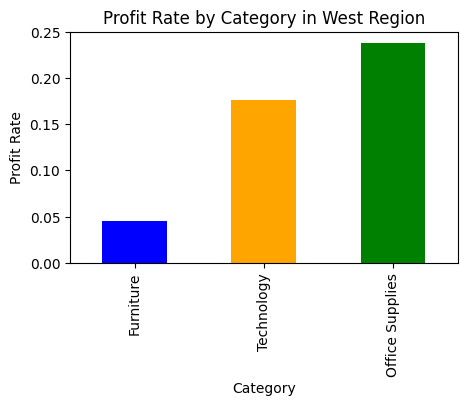

In [19]:
colors = ['blue', 'orange', 'green', 'yellow']
plt.figure(figsize=(5, 3))   
kpibyvar("Category", "West")["Profit Rate"].plot.bar(color=colors)
plt.xlabel("Category")
plt.ylabel("Profit Rate")
plt.title("Profit Rate by Category in West Region")
plt.show()


- Funiture has the lowest profit rate
- Office Supplies has the highest profit rate

## Calculated the Profit Rate by Sub-catagory
- Profit Rate by Descending order within each Category

In [20]:
regiondata = data.loc[data['Region'] == "West"]
    
df1 = regiondata.groupby(["Category", "Sub-Category"])[["Sales", "Profit"]].sum() 
profitrate = df1["Profit"] / df1["Sales"]
df2 = pd.DataFrame(profitrate, columns=["Profit Rate"])
merged_df = pd.merge(df1, df2, left_index=True, right_index=True)
merged_df.rename(columns={'Profit':'Total Profit', 'Sales':'Total Sales'}, inplace=True)


merged_df_sorted = merged_df.sort_values(by=["Category", "Profit Rate"], ascending=[True, False])
merged_df_sorted


Total Sales  Total Profit  Profit Rate
Category        Sub-Category                                        
Furniture       Furnishings    30072.7300     7641.2704     0.254093
                Chairs        101781.3280     4027.5843     0.039571
                Tables         84754.5620     1482.6073     0.017493
                Bookcases      36004.1235    -1646.5117    -0.045731
Office Supplies Envelopes       4118.1000     1908.7624     0.463506
                Paper          26663.7180    12119.2364     0.454522
                Labels          5078.7260     2303.1223     0.453484
                Fasteners        923.2160      275.1907     0.298078
                Binders        55961.1130    16096.8016     0.287643
                Appliances     30236.3360     8261.2699     0.273223
                Art             9212.0660     2374.0970     0.257716
                Storage        70532.8520     8645.3222     0.122572
                Supplies       18127.1220      626.0465     0.034536
Technology      Copiers        49749.2420    19327.2351     0.388493
                Accessories    61114.1160    16484.5983     0.269735
                Phones         98684.3520     9110.7426     0.092322
                Machines       42444.1220     -618.9264    -0.014582

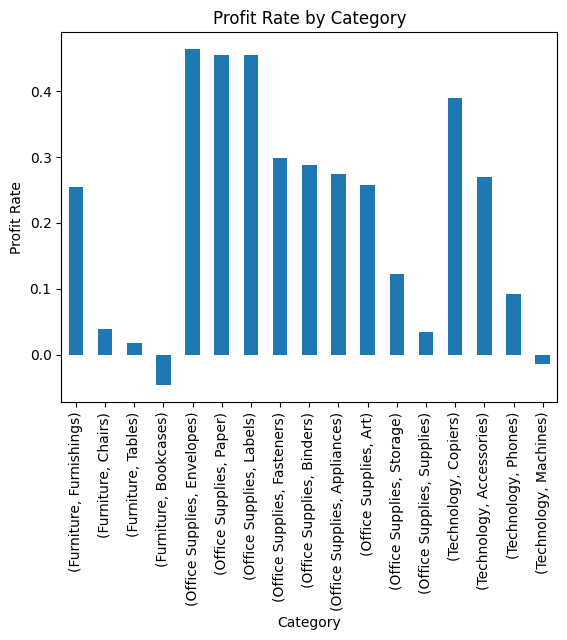

In [21]:
merged_df_sorted["Profit Rate"].plot.bar()
plt.xlabel("Category")
plt.ylabel("Profit Rate")
plt.title("Profit Rate by Category")
plt.show()

In [22]:
data["Order Date"] = pd.to_datetime(data["Order Date"])   
data["Year"] = data["Order Date"].dt.year   
data["Month"] = data["Order Date"].dt.month   

westdata = data.loc[data['Region'] == "West"]
df_yearly_sales = westdata.groupby(["Year"])["Sales"].sum().reset_index()
df_yearly_sales.rename(columns={'Sales': 'Total Sales'}, inplace=True)
df_yearly_sales.head(5)

,Year,Total Sales
0,2014,147883.0330
1,2015,139966.2495
2,2016,187480.1765
3,2017,250128.3655


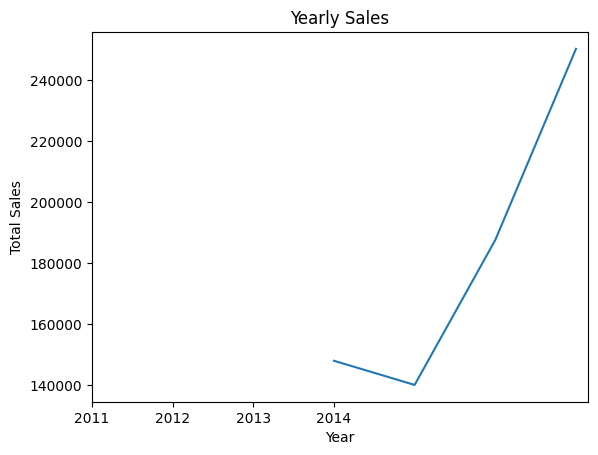

In [23]:
import matplotlib.pyplot as plt

plt.plot(df_yearly_sales["Year"], df_yearly_sales["Total Sales"])
xticks = [2011, 2012, 2013, 2014]   
xtick_labels = [ '2011', '2012', '2013', '2014']  
plt.xticks(xticks, xtick_labels)   
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Yearly Sales")
plt.show()


In [24]:
df_monthly_sales = westdata.groupby(["Year", "Month"])["Sales"].sum().reset_index()
df_monthly_sales.rename(columns={'Sales': 'Total Sales'}, inplace=True)
df_monthly_sales.head(5)

,Year,Month,Total Sales
0,2014,1,2938.723
1,2014,2,1057.956
2,2014,3,11008.898
3,2014,4,9343.487
4,2014,5,6570.438


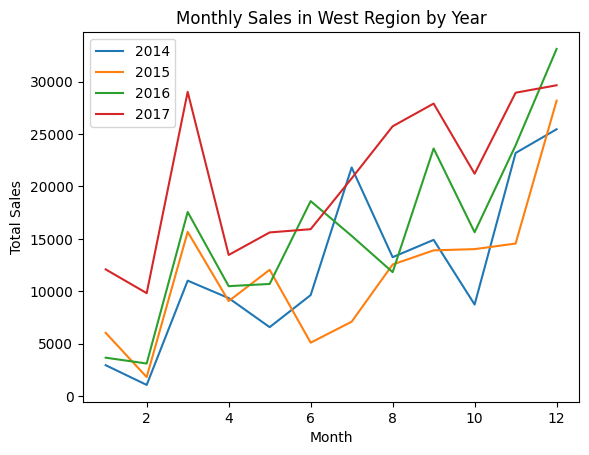

In [25]:
 import matplotlib.pyplot as plt

df_monthly_sales = westdata.groupby(["Year", "Month"])["Sales"].sum().reset_index()
df_monthly_sales.rename(columns={'Sales': 'Total Sales'}, inplace=True)

fig, ax = plt.subplots()

for year in df_monthly_sales["Year"].unique():
    df_yearly_sales = df_monthly_sales[df_monthly_sales["Year"] == year]
    ax.plot(df_yearly_sales["Month"], df_yearly_sales["Total Sales"], label=str(year))

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales in West Region by Year")
ax.legend()
plt.show()


- March September November and December have higest sales 
- Can increase inventory appropriately

In [26]:
import time
import datetime

In [27]:
data["Order Date"]=pd.to_datetime(data["Order Date"])
data1=data[['Order Date','Sales']]
data2=data1.set_index('Order Date').sort_values(by=["Order Date"], ascending=[True])
data2

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,11.784
2014-01-04,272.736
2014-01-04,3.540
2014-01-05,19.536
...,...
2017-12-30,3.024
2017-12-30,52.776
2017-12-30,90.930


In [28]:
data2 = data.resample("M", on="Order Date")["Sales"].sum()
data2 = data2.to_frame()
data2.rename(columns={"Sales": "Total Sales in this month"}, inplace=True)
data2

,Total Sales in this month
Order Date,
2014-01-31,14236.8950
2014-02-28,4519.8920
2014-03-31,55691.0090
2014-04-30,28295.3450
2014-05-31,23648.2870
2014-06-30,34595.1276
2014-07-31,33946.3930
2014-08-31,27909.4685
2014-09-30,81777.3508


In [29]:
data2["MoM"] = data2["Total Sales in this month"].pct_change(periods=1)
data2["YoY"] = data2["Total Sales in this month"].pct_change(periods=12)

data2

,Total Sales in this month,MoM,YoY
Order Date,,,
2014-01-31,14236.8950,NaN,NaN
2014-02-28,4519.8920,-0.682523,NaN
2014-03-31,55691.0090,11.321314,NaN
2014-04-30,28295.3450,-0.491923,NaN
2014-05-31,23648.2870,-0.164234,NaN
2014-06-30,34595.1276,0.462902,NaN
2014-07-31,33946.3930,-0.018752,NaN
2014-08-31,27909.4685,-0.177837,NaN
2014-09-30,81777.3508,1.930093,NaN


# Returns

In [30]:
data_2.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999




- Merge order table and return table



In [31]:
return_order = pd.merge(data,data_2,on='Order ID')
return_order

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
0,19,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824,Yes
1,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110,Yes
2,21,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,4,0.2,7.3840,Yes
3,56,CA-2016-111682,2016-06-17,2016-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,East,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,208.560,6,0.0,52.1400,Yes
4,57,CA-2016-111682,2016-06-17,2016-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,East,OFF-PA-10001569,Office Supplies,Paper,Xerox 232,32.400,5,0.0,15.5520,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,9958,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,East,OFF-PA-10004039,Office Supplies,Paper,Xerox 1882,223.920,4,0.0,109.7208,Yes
796,9959,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,East,OFF-SU-10001574,Office Supplies,Supplies,Acme Value Line Scissors,7.300,2,0.0,2.1900,Yes
797,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,Yes
798,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,Yes


In [32]:
return_order["Order Date"] = pd.to_datetime(return_order["Order Date"])   
return_order["Year"] = return_order["Order Date"].dt.year   

- Calculate the number of returned order for each category 

In [33]:
return_by_category = return_order.groupby(['Year','Category'])[["Order ID"]].count()
return_by_category

Order ID
Year Category                 
2014 Furniture              30
     Office Supplies        90
     Technology             31
2015 Furniture              35
     Office Supplies        91
     Technology             37
2016 Furniture              36
     Office Supplies       126
     Technology             35
2017 Furniture              70
     Office Supplies       166
     Technology             53

In [34]:
data["Order Date"] = pd.to_datetime(data["Order Date"])   
data["Year"] = data["Order Date"].dt.year  
 

total_by_category = data.groupby(['Year','Category'])[["Order ID"]].count()
total_by_category

Order ID
Year Category                 
2014 Furniture             421
     Office Supplies      1217
     Technology            355
2015 Furniture             452
     Office Supplies      1241
     Technology            409
2016 Furniture             562
     Office Supplies      1566
     Technology            459
2017 Furniture             686
     Office Supplies      2002
     Technology            624

- Calculate return rate for each category 

In [35]:
return_rate = return_by_category["Order ID"] / total_by_category["Order ID"]
df_returnrate = pd.DataFrame({"Return Rate": return_rate})
df_returnrate["Return Rate"] = df_returnrate["Return Rate"]
df_returnrate


Return Rate
Year Category                    
2014 Furniture           0.071259
     Office Supplies     0.073952
     Technology          0.087324
2015 Furniture           0.077434
     Office Supplies     0.073328
     Technology          0.090465
2016 Furniture           0.064057
     Office Supplies     0.080460
     Technology          0.076253
2017 Furniture           0.102041
     Office Supplies     0.082917
     Technology          0.084936

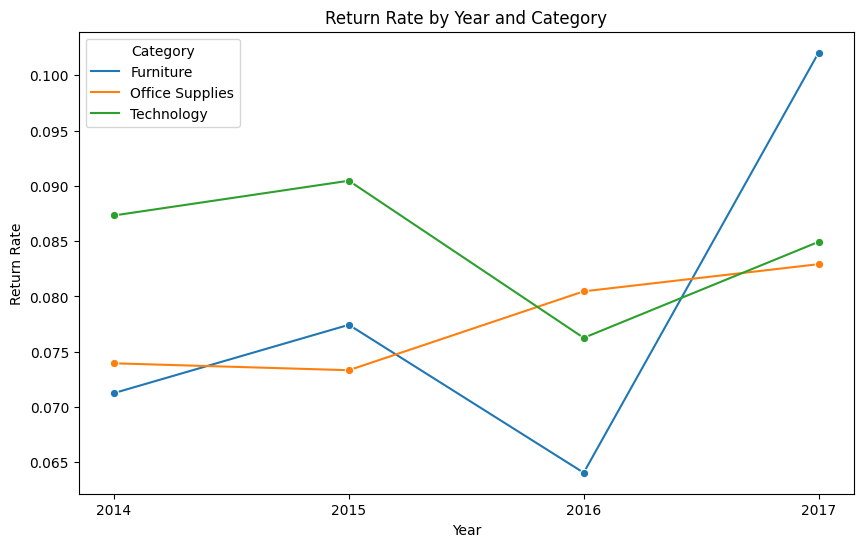

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))

sns.lineplot(data=df_returnrate, x='Year', y='Return Rate', hue='Category', marker='o')


ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.legend(title='Category')
plt.xlabel('Year')
plt.ylabel('Return Rate')
plt.title('Return Rate by Year and Category')

plt.show()


In [37]:
return_by_subcategory = return_order.groupby(['Sub-Category'])[["Order ID"]].count()
return_by_subcategory
data["Order Date"] = pd.to_datetime(data["Order Date"])   
data["Year"] = data["Order Date"].dt.year   
total_by_subcategory = data.groupby(['Sub-Category'])[["Order ID"]].count()
return_rate = return_by_subcategory["Order ID"] / total_by_subcategory["Order ID"]
df_returnrate1 = pd.DataFrame({"Return Rate": return_rate})
df_returnrate1["Return Rate"] = df_returnrate1["Return Rate"]
df_returnrate1

,Return Rate
Sub-Category,
Accessories,0.078710
Appliances,0.085837
Art,0.059045
Binders,0.089954
Bookcases,0.070175
Chairs,0.085900
Copiers,0.073529
Envelopes,0.051181
Fasteners,0.087558


In [38]:
return_by_seg = return_order.groupby(['Segment'])[["Order ID"]].count()
data["Order Date"] = pd.to_datetime(data["Order Date"])   
data["Year"] = data["Order Date"].dt.year   
total_by_seg = data.groupby(['Segment'])[["Order ID"]].count()
return_rate = return_by_seg["Order ID"] / total_by_seg["Order ID"]
df_returnrate = pd.DataFrame({"Return Rate": return_rate})
df_returnrate["Return Rate"] = df_returnrate["Return Rate"]
df_returnrate

,Return Rate
Segment,
Consumer,0.082065
Corporate,0.085099
Home Office,0.065620


In [39]:
return_by_region = return_order.groupby(['Year','Region'])[["Order ID"]].count()
return_by_region 

data["Order Date"] = pd.to_datetime(data["Order Date"])   
data["Year"] = data["Order Date"].dt.year   
total_by_region  = data.groupby(['Year','Region'])[["Order ID"]].count()
total_by_region 
return_rate3 = return_by_region ["Order ID"] / total_by_region ["Order ID"]
df_returnrate3 = pd.DataFrame({"Return Rate": return_rate3})
df_returnrate3["Return Rate"] = df_returnrate3["Return Rate"]
df_returnrate3


Return Rate
Year Region              
2014 Central     0.055794
     East        0.056093
     South       0.040115
     West        0.124054
2015 Central     0.039916
     East        0.057453
     South       0.047059
     West        0.141745
2016 Central     0.026534
     East        0.045692
     South       0.046005
     West        0.157764
2017 Central     0.039846
     East        0.052117
     South       0.038610
     West        0.173516

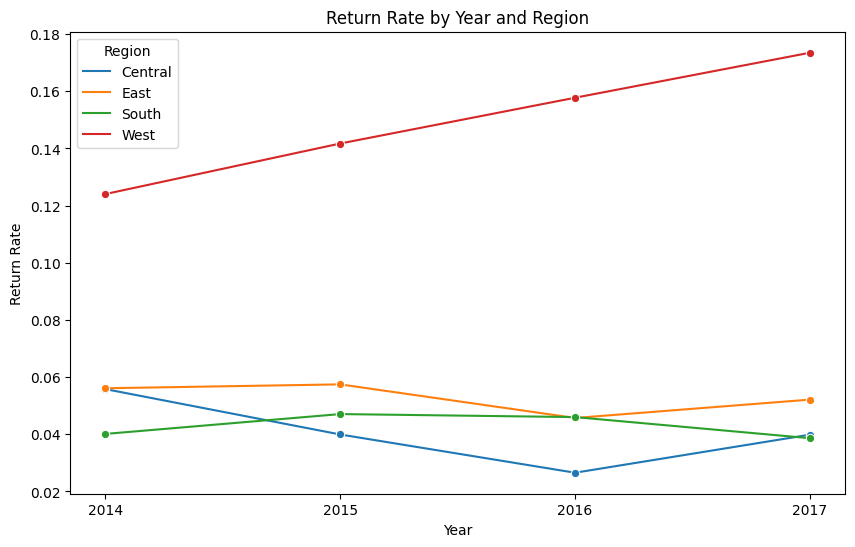

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_returnrate3, x='Year', y='Return Rate', hue='Region', marker='o')

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend(title='Region')
plt.xlabel('Year')
plt.ylabel('Return Rate')
plt.title('Return Rate by Year and Region')

plt.show()

- WEST region has highest return rate

In [41]:
return_order_west = return_order.loc[return_order['Region'] == "West"]
data_west = data.loc[data['Region'] == "West"]

return_by_subcategory2 = return_order_west.groupby(['Sub-Category'])[["Order ID"]].count()
return_by_subcategory2
data["Order Date"] = pd.to_datetime(data["Order Date"])  
data["Year"] = data["Order Date"].dt.year   
total_by_subcategory2 = data_west.groupby(['Sub-Category'])[["Order ID"]].count()
return_rate = return_by_subcategory2["Order ID"] / total_by_subcategory2["Order ID"]
df_returnrate4 = pd.DataFrame({"Return Rate": return_rate})
df_returnrate4["Return Rate"] = df_returnrate4["Return Rate"]
df_returnrate4_sorted = df_returnrate4.sort_values(by='Return Rate', ascending=False)
df_returnrate4_sorted

,Return Rate
Sub-Category,
Fasteners,0.208333
Machines,0.205128
Appliances,0.191176
Binders,0.178344
Paper,0.173333
Chairs,0.169082
Tables,0.155172
Furnishings,0.148026
Phones,0.148014


In [42]:
return_by_seg = return_order_west.groupby(['Segment'])[["Order ID"]].count()
 
data["Order Date"] = pd.to_datetime(data["Order Date"])   
data["Year"] = data["Order Date"].dt.year   
total_by_seg = data_west.groupby(['Segment'])[["Order ID"]].count()
return_rate = return_by_seg["Order ID"] / total_by_seg["Order ID"]
df_returnrate5 = pd.DataFrame({"Return Rate": return_rate})
df_returnrate5["Return Rate"] = df_returnrate5["Return Rate"]
df_returnrate5_sorted = df_returnrate5.sort_values(by='Return Rate', ascending=False)
df_returnrate5_sorted

,Return Rate
Segment,
Corporate,0.163542
Consumer,0.155502
Home Office,0.127846
